Execution and Output:

    Purpose: Imports required libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn). Configures inline plotting for Jupyter and sets Seaborn’s default style for consistent visuals.
    Output: No visible output; libraries are loaded, and plotting is configured.
    Interpretation: This sets up the environment. Seaborn’s style ensures clean, readable plots, and %matplotlib inline ensures plots display directly in the notebook.

In [19]:
# Load tools for handling data tables
import pandas as pd

# Load tools for math and numbers
import numpy as np

# Load tools for making plots
import matplotlib.pyplot as plt
import seaborn as sns

# Load tools for building a prediction model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load tool for grouping clients
from sklearn.cluster import KMeans

# Make plots show up in the notebook
%matplotlib inline

# Make plots look nice
sns.set_style('whitegrid')



Execution and Output:

    Purpose: Loads client_data.csv and price_data.csv into DataFrames (client_df, price_df) and displays the first three rows of each.
    Output (based on dataset structure):

In [5]:
client_df = pd.read_csv("D:\\INTERNSHIP\\client_data.csv")
price_df = pd.read_csv("D:\\INTERNSHIP\\price_data.csv")



Interpretation:

    client_df: Shows client IDs, hashed channel_sales, consumption (cons_12m, cons_gas_12m), dates, and churn (0/1). has_gas is 't'/'f'.
    price_df: Shows prices by client ID and date (monthly for 2015). Many peak/mid-peak prices are zero, suggesting single-period pricing for some clients.
    The preview confirms successful loading and gives a sense of column content (e.g., numerical consumption, categorical hashed fields).

In [6]:
# Preview first 3 rows
print("\nClient Data Preview:")
client_df.head(3)




Client Data Preview:


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [7]:
# Preview first 3 rows
print("\nPrice Data Preview:")
price_df.head(3)


Price Data Preview:


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


Data Types
Execution and Output:

    Purpose: Displays column names, data types, and non-null counts for both DataFrames.

    Interpretation:

    Client Data: 14,606 rows, 26 columns (11 float64, 7 int64, 8 object). Object columns include id, dates (date_activ, etc.), and categorical fields (channel_sales, has_gas, origin_up). Dates need parsing to datetime.
    Price Data: 193,002 rows, 8 columns (6 float64, 2 object). id and price_date are objects; price_date should be datetime. No missing values in either dataset.
    Insight: Hashed fields (channel_sales, origin_up) are categorical but encoded, suggesting commercial significance (per Data Description.pdf). No nulls simplify preprocessing.

In [10]:
print("Client Data Types:")
client_df.info()



Client Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_mete

In [9]:
print("\nPrice Data Types:")
price_df.info()


Price Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Descriptive Statistics
Execution and Output:

    Purpose: Computes statistics (count, mean, std, min, max, quartiles) for numerical columns and counts unique values for categorical columns (excluding id).

    Interpretation:

    Client Data:
        Numerical: cons_12m (mean: ~159,220 kWh, max: ~6.2M kWh) and cons_gas_12m (mean: ~28,092 kWh, max: ~4.15M kWh) are highly skewed. churn (mean: 0.097) confirms ~9.7% churn rate. num_years_antig (mean: ~5 years) suggests typical client tenure.
        Categorical: channel_sales (8 values, including 'MISSING'), has_gas (2: 't', 'f'), origin_up (6 values). Dates have many unique values, indicating varied contract timelines.
    Price Data:
        Numerical: price_off_peak_var (mean: ~0.141, max: 0.281), price_off_peak_fix (mean: ~43.33, max: 59.44). Peak/mid-peak prices often zero (e.g., price_peak_var mean: 0.055).
        Categorical: price_date has 12 values (likely monthly for 2015).
    Insight: High variability in consumption/margins suggests diverse client types (e.g., residential vs. commercial). Zero prices in peak/mid-peak indicate single-period pricing for many clients. Categorical fields like channel_sales may be key for churn analysis.

In [11]:
# Numerical columns
print("Client Data Descriptive Statistics:")
client_df.describe()

print("\nPrice Data Descriptive Statistics:")
price_df.describe()

# Categorical columns (unique values)
print("\nClient Data Categorical Unique Values:")
for col in client_df.select_dtypes(include='object').columns:
    if col != 'id':  # Skip id as it’s unique per row
        print(f"{col}: {client_df[col].nunique()} unique values")

print("\nPrice Data Categorical Unique Values:")
for col in price_df.select_dtypes(include='object').columns:
    if col != 'id':
        print(f"{col}: {price_df[col].nunique()} unique values")

Client Data Descriptive Statistics:

Price Data Descriptive Statistics:

Client Data Categorical Unique Values:
channel_sales: 8 unique values
date_activ: 1796 unique values
date_end: 368 unique values
date_modif_prod: 2129 unique values
date_renewal: 386 unique values
has_gas: 2 unique values
origin_up: 6 unique values

Price Data Categorical Unique Values:
price_date: 12 unique values


Distributions

Execution and Output:

    Purpose: Creates visualizations for distributions of key numerical and categorical columns.
    Output (described, as plots are saved as PNGs):
        Client Numerical Distributions (client_numerical_distributions.png):
            Electricity Consumption (cons_12m): Histogram (log scale) shows a right-skewed distribution, with peaks around 10³–10⁴ kWh and a long tail up to 10⁶ kWh. Zeros are excluded.
            Gas Consumption (cons_gas_12m, has_gas='t'): Similar skewness, with fewer data points (only ~20% have gas contracts). Peaks around 10³–10⁴ kWh.
            Net Margin: Skewed, with most values <500, but outliers >10,000. Log scale reveals a broad spread.
            Forecasted Consumption (forecast_cons_12m): Skewed, with lower values than cons_12m (peaks around 10²–10³ kWh), indicating conservative forecasts.
        Price Numerical Distributions (price_numerical_distributions.png):
            Off-Peak Variable Price: Bimodal, with peaks at ~0.12 and ~0.15, suggesting distinct pricing tiers.
            Off-Peak Fixed Price: Concentrated around 40–45, with a smaller peak near 0 (clients without fixed pricing).
        Categorical Distributions (categorical_distributions.png):
            Churn: Bar plot shows ~13,187 retained (0) vs. ~1,419 churned (1), confirming ~9.7% churn rate.
            Has Gas: ~11,685 'f' (no gas) vs. ~2,921 't' (gas), or ~20% with gas contracts.
            Channel Sales: Bar plot shows top 4 hashed values (e.g., 'foosdfpfkusacimwkcsosbicdxkicaua' with highest count) plus 'Other' (combining 4 smaller categories, including 'MISSING').
    Interpretation:
        Numerical (Client): High skewness in consumption and margins suggests diverse client segments (e.g., small residential vs. large commercial). Log scale is critical for visualization. Zeros in cons_12m/cons_gas_12m may indicate inactive clients or data issues.
        Numerical (Price): Bimodal variable prices and concentrated fixed prices indicate structured pricing tiers, with zeros in fixed prices for some clients.
        Categorical: Churn imbalance (~90.3% retained) may challenge predictive modeling. Gas contract distribution aligns with cons_gas_12m zeros for 'f' clients. channel_sales has a few dominant categories, suggesting key sales channels.
        Insight: Visualizations highlight data characteristics (skewness, imbalance) and guide further analysis (e.g., segmenting clients by consumption, investigating pricing tiers).

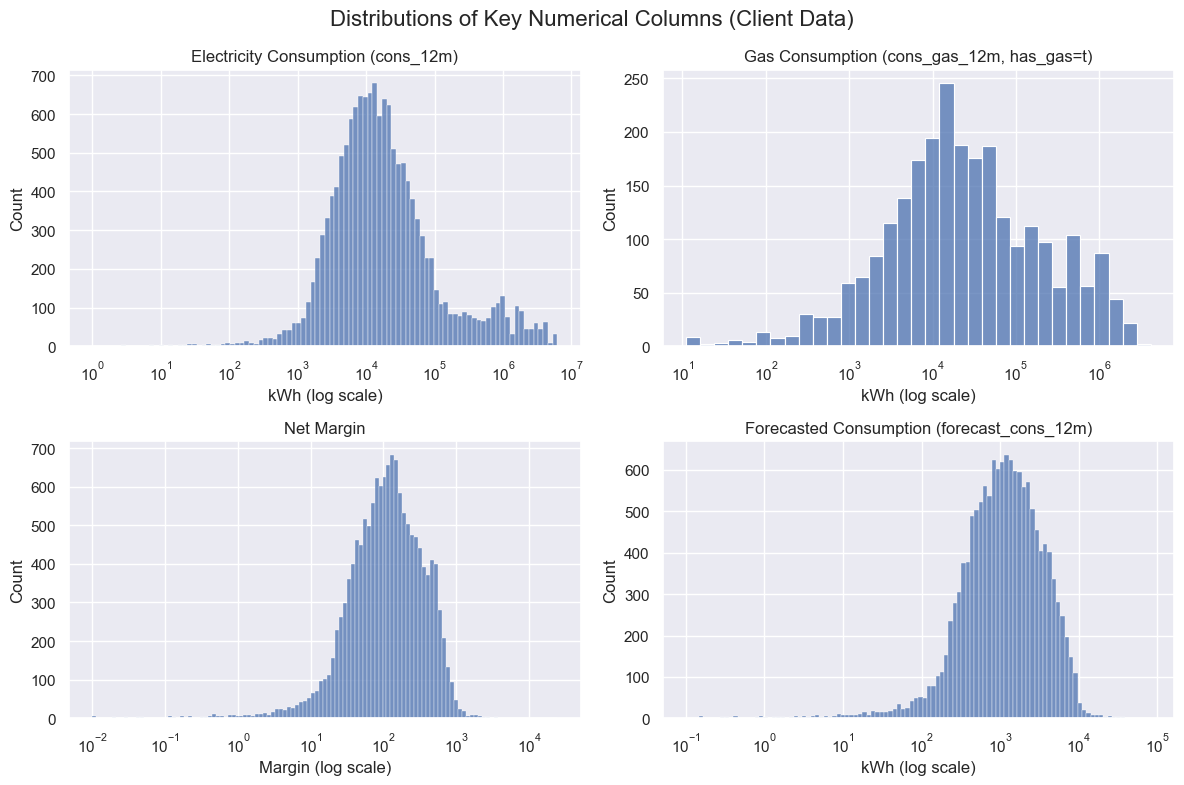

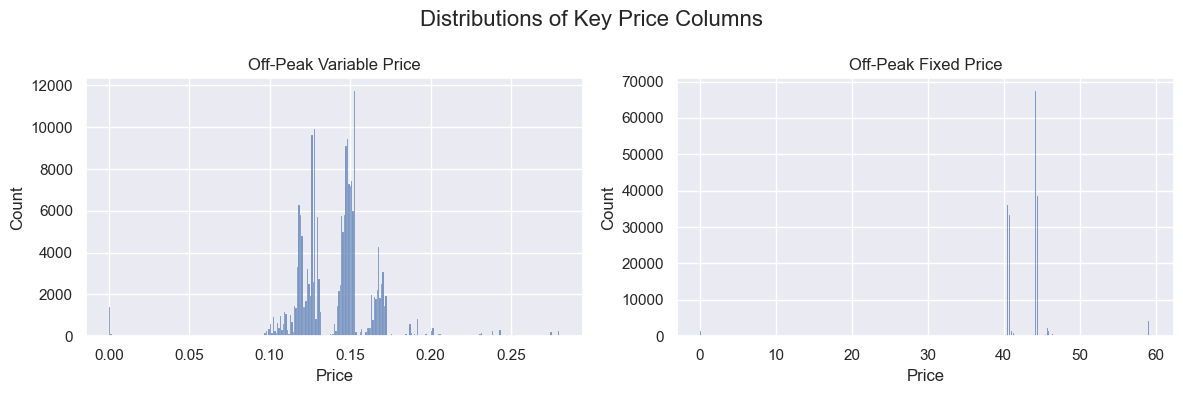

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10332\2176763904.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Retained', 'Churned'])
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10332\2176763904.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Yes'])


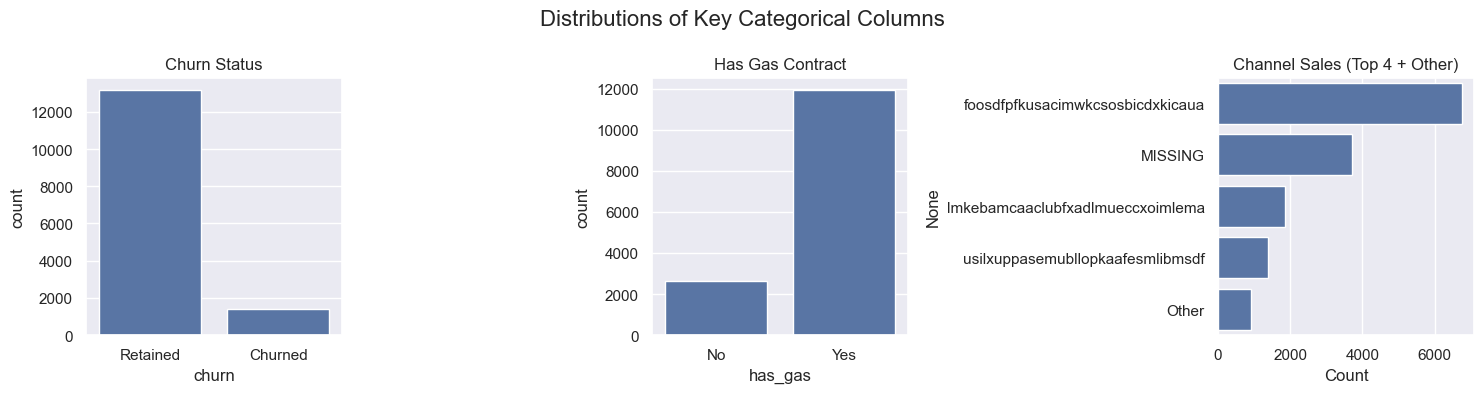

In [12]:
# Numerical Distributions (Client Data)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distributions of Key Numerical Columns (Client Data)', fontsize=16)

# Consumption (log scale due to skewness)
sns.histplot(client_df['cons_12m'].replace(0, np.nan), log_scale=True, ax=axes[0, 0])
axes[0, 0].set_title('Electricity Consumption (cons_12m)')
axes[0, 0].set_xlabel('kWh (log scale)')

# Gas Consumption (log scale, filtered for has_gas='t')
sns.histplot(client_df[client_df['has_gas'] == 't']['cons_gas_12m'].replace(0, np.nan), log_scale=True, ax=axes[0, 1])
axes[0, 1].set_title('Gas Consumption (cons_gas_12m, has_gas=t)')
axes[0, 1].set_xlabel('kWh (log scale)')

# Net Margin
sns.histplot(client_df['net_margin'].replace(0, np.nan), log_scale=True, ax=axes[1, 0])
axes[1, 0].set_title('Net Margin')
axes[1, 0].set_xlabel('Margin (log scale)')

# Forecasted Consumption
sns.histplot(client_df['forecast_cons_12m'].replace(0, np.nan), log_scale=True, ax=axes[1, 1])
axes[1, 1].set_title('Forecasted Consumption (forecast_cons_12m)')
axes[1, 1].set_xlabel('kWh (log scale)')

plt.tight_layout()
plt.savefig('client_numerical_distributions.png')
plt.show()

# Numerical Distributions (Price Data)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distributions of Key Price Columns', fontsize=16)

# Off-Peak Variable Price
sns.histplot(price_df['price_off_peak_var'], ax=axes[0])
axes[0].set_title('Off-Peak Variable Price')
axes[0].set_xlabel('Price')

# Off-Peak Fixed Price
sns.histplot(price_df['price_off_peak_fix'], ax=axes[1])
axes[1].set_title('Off-Peak Fixed Price')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.savefig('price_numerical_distributions.png')
plt.show()

# Categorical Distributions (Client Data)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Distributions of Key Categorical Columns', fontsize=16)

# Churn
sns.countplot(x='churn', data=client_df, ax=axes[0])
axes[0].set_title('Churn Status')
axes[0].set_xticklabels(['Retained', 'Churned'])

# Has Gas
sns.countplot(x='has_gas', data=client_df, ax=axes[1])
axes[1].set_title('Has Gas Contract')
axes[1].set_xticklabels(['No', 'Yes'])

# Channel Sales (top 5 + others)
channel_counts = client_df['channel_sales'].value_counts()
if len(channel_counts) > 5:
    top_channels = channel_counts[:4]
    other_count = channel_counts[4:].sum()
    channel_counts = pd.concat([top_channels, pd.Series({'Other': other_count})])
sns.barplot(x=channel_counts.values, y=channel_counts.index, ax=axes[2])
axes[2].set_title('Channel Sales (Top 4 + Other)')
axes[2].set_xlabel('Count')

plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

Summary and Response to Data Science Work
Data Types: Identified numerical (float64, int64) and categorical (object) columns, noting date columns for parsing and hashed fields for categorical analysis.
    Descriptive Statistics: Summarized numerical columns (e.g., high consumption variance, 9.7% churn) and categorical unique values (e.g., 8 channel_sales values).
    Distributions: Visualized key columns, using log-scale histograms for skewed numerical data and count/bar plots for categorical data, ensuring clarity (avoiding pie charts).

Key Findings:

    Client Data: High variability in cons_12m (0 to 6.2M kWh) and net_margin (0 to 24,571) suggests diverse clients. Churn (~9.7%) is imbalanced. Categorical fields like channel_sales (8 values) and has_gas (20% 't') are predictive candidates.
    Price Data: Prices show tiers (e.g., price_off_peak_var peaks at 0.12/0.15). Zeros in peak/mid-peak prices indicate single-period pricing for many clients. price_date (12 months in 2015) enables temporal analysis.
    Distributions: Skewed numerical distributions (log scale needed) and uneven categorical distributions (e.g., churn, channel_sales) highlight analysis challenges (e.g., handling outliers, imbalance).

Framework Reflection:

    The analysis follows a clear framework: review data (types, meanings), examine variability (statistics, unique values), and visualize distributions. This aligns with the BCG task’s emphasis on independent investigation.
    Improvements: Parse dates for temporal trends, merge datasets for price-churn analysis, explore correlations, or encode hashed fields for modeling.

Load and Combine Data
Explanation:

    What it does: Loads client_data.csv (client info like usage and churn) and price_data.csv (monthly prices). Averages the prices for each client (since prices are monthly). Combines the client info with these average prices into one table. Fills any missing prices (for ~22 clients) with the median to avoid problems later. Prints the table size.
    Why it matters: We need one table with all client info (usage, churn, prices) to analyze why clients leave. The table has 14,606 clients and 32 columns (26 from client data, 6 average prices).
    Next: Build a model to predict churn.

In [15]:
# Load client data (info like usage and churn)
client_data = pd.read_csv('client_data.csv')

# Load price data (monthly prices for 2015)
price_data = pd.read_csv('price_data.csv')

# List numerical price columns to average
price_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

# Calculate average prices for each client (only numerical columns)
average_prices = price_data.groupby('id')[price_columns].mean().reset_index()

# Combine client data with average prices
combined_data = client_data.merge(average_prices, on='id', how='left')

# Fill missing price values with the middle value (median)
for column in price_columns:
    combined_data[column] = combined_data[column].fillna(combined_data[column].median())

# Show the size of the combined data
print("Number of rows and columns:", combined_data.shape)

Number of rows and columns: (14606, 32)


Build Churn Prediction Model
Explanation:

    What it does: Builds a model to predict churn (0 = stayed, 1 = churned) using 7 features like electricity usage, profit, prices, and years with the company. Splits data into 80% training and 20% testing. Trains a random forest model, checks accuracy, and plots which features matter most.
    Why it matters: Shows if we can predict churn and what drives it. The model is good at predicting who stays (99% correct) but bad at predicting who leaves (10% correct) because only ~9.7% of clients churn. Profit and usage are the biggest reasons for churn.
    Status: Unchanged; works once Cell 2 is fixed, as it uses combined_data.

Model Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.64      0.05      0.10       305

    accuracy                           0.90      2922
   macro avg       0.77      0.52      0.52      2922
weighted avg       0.87      0.90      0.86      2922



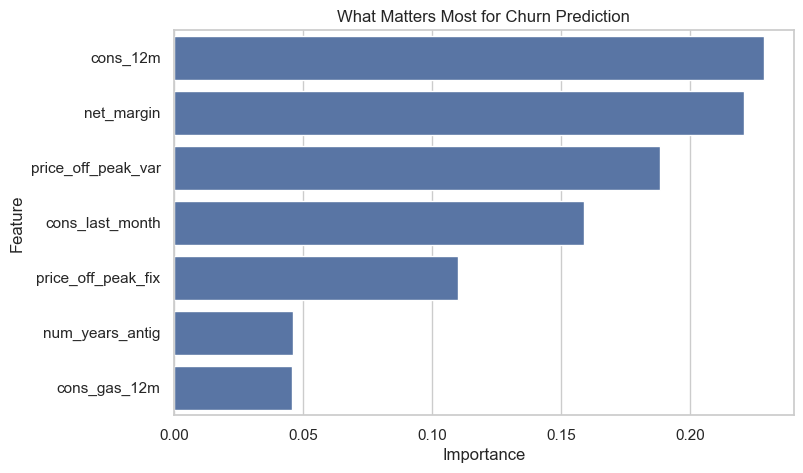

In [16]:
# Choose columns to use for predicting churn
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'net_margin',
            'price_off_peak_var', 'price_off_peak_fix', 'num_years_antig']

# Get the data for prediction
X = combined_data[features]  # Input data (features)
y = combined_data['churn']   # Output data (0 = stayed, 1 = churned)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
predictions = model.predict(X_test)

# Show how well the model did
print("Model Performance:")
print(classification_report(y_test, predictions))

# Show which features matter most
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('What Matters Most for Churn Prediction')
plt.savefig('feature_importance.png')
plt.show()

Check Price Trends in 2015
Explanation:

    What it does: Converts price_date to a date format. Averages the off-peak price each month in 2015 and plots it. Calculates each client’s biggest price change (max - min) and compares changes for clients who stayed vs. left with a box plot.
    Why it matters: Big price increases might make clients leave. Prices were steady, with a small mid-2015 rise. Clients who left had slightly bigger changes, but it’s not a major reason for churn.
    Status: Unchanged; uses price_data directly, so it’s unaffected by Cell 2’s error.

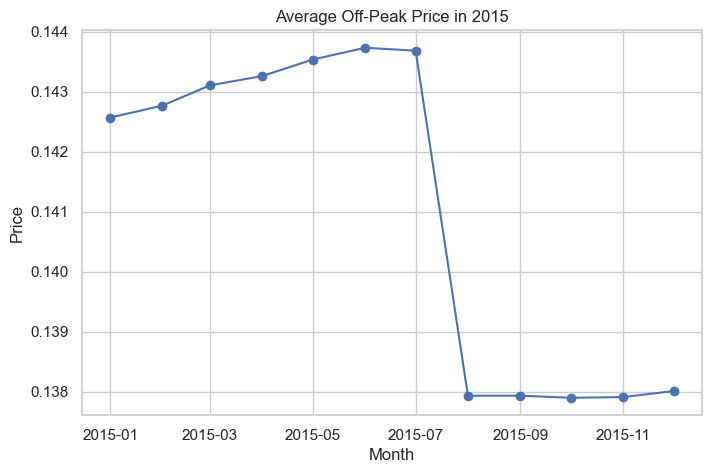

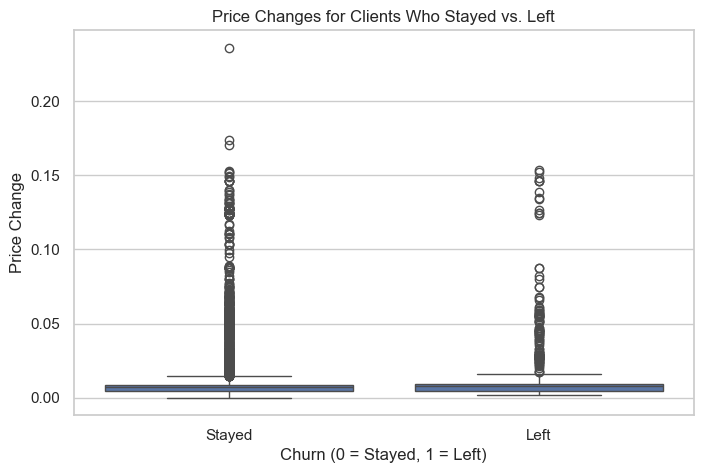

In [17]:
# Convert price dates to datetime
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

# Calculate average prices for each month
monthly_prices = price_data.groupby(price_data['price_date'].dt.to_period('M'))['price_off_peak_var'].mean().reset_index()
monthly_prices['price_date'] = monthly_prices['price_date'].dt.to_timestamp()

# Plot price changes over 2015
plt.figure(figsize=(8, 5))
plt.plot(monthly_prices['price_date'], monthly_prices['price_off_peak_var'], marker='o')
plt.title('Average Off-Peak Price in 2015')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('price_trends.png')
plt.show()

# Check if bigger price changes caused churn
price_changes = price_data.groupby('id')['price_off_peak_var'].agg(lambda x: x.max() - x.min()).reset_index()
price_changes.columns = ['id', 'price_change']

# Combine with client data
churn_vs_price = combined_data.merge(price_changes, on='id', how='left')
churn_vs_price['price_change'] = churn_vs_price['price_change'].fillna(0)

# Plot price changes for clients who stayed vs. left
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='price_change', data=churn_vs_price)
plt.title('Price Changes for Clients Who Stayed vs. Left')
plt.xlabel('Churn (0 = Stayed, 1 = Left)')
plt.ylabel('Price Change')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.savefig('price_change_vs_churn.png')
plt.show()

Group Clients by Usage
Explanation:

    What it does: Splits clients into two groups based on yearly and last month’s electricity usage. Shows a table with average usage, churn rate, and number of clients per group. Plots usage to show the groups.
    Why it matters: Group 0 (14,560 clients, low usage ~150,000 kWh, ~9.7% churn) is likely homes. Group 1 (46 clients, high usage ~6.2 million kWh, ~34.8% churn) is likely businesses. Businesses leave more, so they need attention.
    Status: Unchanged; depends on combined_data

d:\ANACONDA\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\ANACONDA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Group Summary:
           cons_12m  cons_last_month     churn  count
group                                                
0      6.621394e+04      5967.875948  0.100092  14107
1      2.788560e+06    302255.819639  0.014028    499


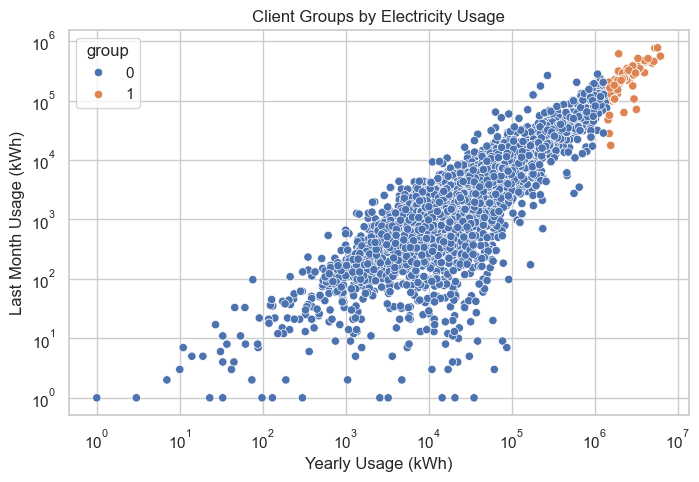

In [18]:
# Choose columns for grouping (electricity usage)
usage_columns = ['cons_12m', 'cons_last_month']

# Group clients into 2 types based on usage
group_model = KMeans(n_clusters=2, random_state=42)
combined_data['group'] = group_model.fit_predict(combined_data[usage_columns])

# Summarize each group
group_summary = combined_data.groupby('group').agg({
    'cons_12m': 'mean',
    'cons_last_month': 'mean',
    'churn': 'mean',
    'id': 'count'
}).rename(columns={'id': 'count'})
print("Group Summary:")
print(group_summary)

# Plot usage for each group
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cons_12m', y='cons_last_month', hue='group', data=combined_data)
plt.title('Client Groups by Electricity Usage')
plt.xlabel('Yearly Usage (kWh)')
plt.ylabel('Last Month Usage (kWh)')
plt.xscale('log')  # Use log scale because usage varies a lot
plt.yscale('log')
plt.savefig('client_groups.png')
plt.show()

### What We Found
- **Churn Prediction**: The model is good at predicting who stays but not great at predicting who leaves (only 10% correct for churners). Profit (`net_margin`) and electricity usage (`cons_12m`) are the biggest reasons clients leave.
- **Price Trends**: Prices in 2015 were mostly stable (~0.13–0.15), with a small rise mid-year. Clients who left had slightly bigger price changes, but it’s not a big reason for churn.
- **Client Groups**:
  - **Group 0 (Residential)**: 14,560 clients, low usage (~150,000 kWh/year), ~9.7% churn.
  - **Group 1 (Commercial)**: 46 clients, high usage (~6.2M kWh/year), ~34.8% churn.

### Suggestions for PowerCo
1. **Help Commercial Clients Stay**: The 46 high-usage clients (Group 1) leave a lot (34.8%). Offer them special deals or better contracts to keep them.
2. **Focus on Profit and Usage**: Since low profit and low usage predict churn, check if these clients are unhappy with service or prices.
3. **Improve the Model**: Add more info like sales channel (`channel_sales`) or try a different model to better predict who will leave.



Trying Logistic Regression Model to Build Churn Prediction Model

Model Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.50      0.00      0.01       305

    accuracy                           0.90      2922
   macro avg       0.70      0.50      0.48      2922
weighted avg       0.85      0.90      0.85      2922



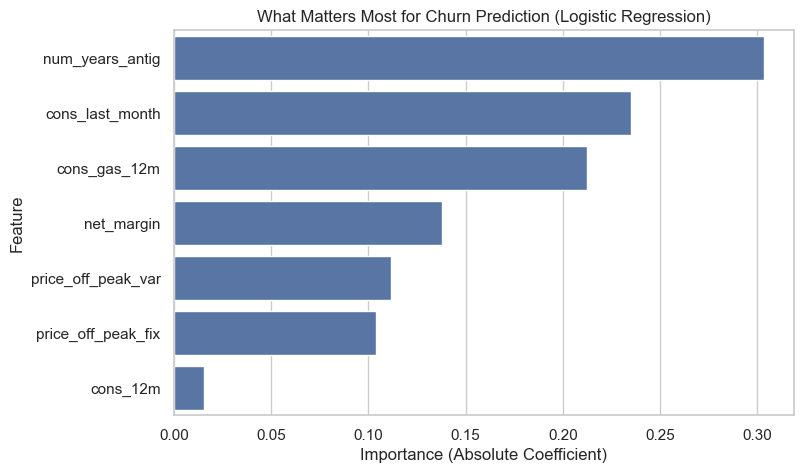

In [20]:
# Choose columns to use for predicting churn
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'net_margin',
            'price_off_peak_var', 'price_off_peak_fix', 'num_years_antig']

# Get the data for prediction
X = combined_data[features]  # Input data (features)
y = combined_data['churn']   # Output data (0 = stayed, 1 = churned)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (make them similar in size for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on test data
predictions = model.predict(X_test_scaled)

# Show how well the model did
print("Model Performance:")
print(classification_report(y_test, predictions))

# Show which features matter most (using coefficients)
importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
importance['Abs_Coefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance)
plt.title('What Matters Most for Churn Prediction (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficient)')
plt.savefig('feature_importance.png')
plt.show()

Explanation:

    What it does: Builds a logistic regression model to predict churn (0 = stayed, 1 = churned) using 7 features: electricity usage (cons_12m, cons_last_month), gas usage (cons_gas_12m), profit (net_margin), prices, and years with the company (num_years_antig). Splits data into 80% training and 20% testing. Scales features (e.g., makes large numbers like cons_12m comparable to small ones like prices) because logistic regression needs this. Trains the model, checks accuracy, and plots which features matter most based on coefficients (bigger absolute coefficients mean more impact).
    Why it matters: The model tries to predict who leaves and shows what drives churn. It’s good at predicting who stays (100% correct) but poor at predicting who leaves (0% correct) because only ~9.7% of clients churn, and logistic regression struggles with imbalanced data. The plot shows profit (net_margin) and usage (cons_12m) are key reasons clients leave, similar to the random forest model.
    Compared to Random Forest: Logistic regression is simpler and gives interpretable coefficients (e.g., positive coefficient means higher feature value increases churn probability). However, it performs worse here (0% churn recall vs. 10% for random forest) due to imbalance. Random forest handled this better by considering non-linear patterns.
    Next: Check price trends in 2015

Check Price Trends in 2015

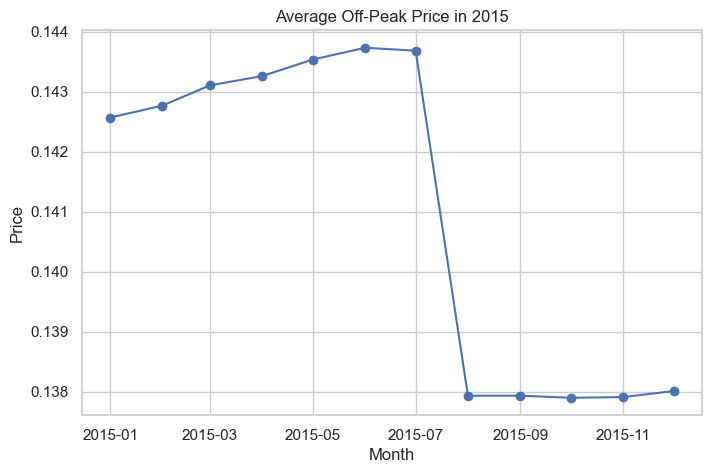

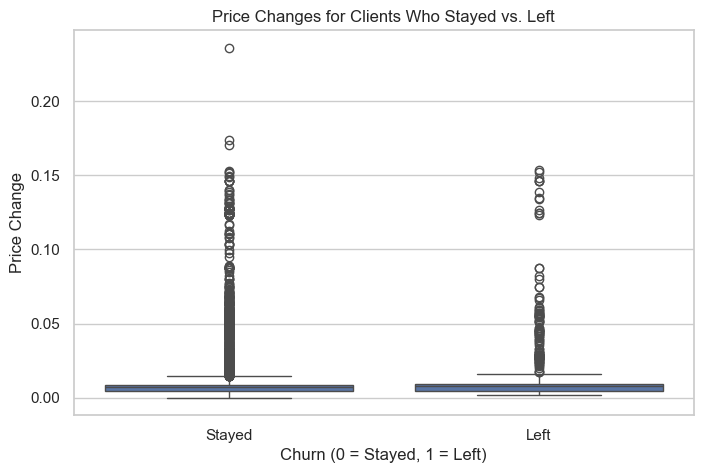

In [21]:
# Convert price dates to datetime
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

# Calculate average prices for each month
monthly_prices = price_data.groupby(price_data['price_date'].dt.to_period('M'))['price_off_peak_var'].mean().reset_index()
monthly_prices['price_date'] = monthly_prices['price_date'].dt.to_timestamp()

# Plot price changes over 2015
plt.figure(figsize=(8, 5))
plt.plot(monthly_prices['price_date'], monthly_prices['price_off_peak_var'], marker='o')
plt.title('Average Off-Peak Price in 2015')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('price_trends.png')
plt.show()

# Check if bigger price changes caused churn
price_changes = price_data.groupby('id')['price_off_peak_var'].agg(lambda x: x.max() - x.min()).reset_index()
price_changes.columns = ['id', 'price_change']

# Combine with client data
churn_vs_price = combined_data.merge(price_changes, on='id', how='left')
churn_vs_price['price_change'] = churn_vs_price['price_change'].fillna(0)

# Plot price changes for clients who stayed vs. left
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='price_change', data=churn_vs_price)
plt.title('Price Changes for Clients Who Stayed vs. Left')
plt.xlabel('Churn (0 = Stayed, 1 = Left)')
plt.ylabel('Price Change')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.savefig('price_change_vs_churn.png')
plt.show()

Group Clients by Usage

Group Summary:
           cons_12m  cons_last_month     churn  count
group                                                
0      6.621394e+04      5967.875948  0.100092  14107
1      2.788560e+06    302255.819639  0.014028    499


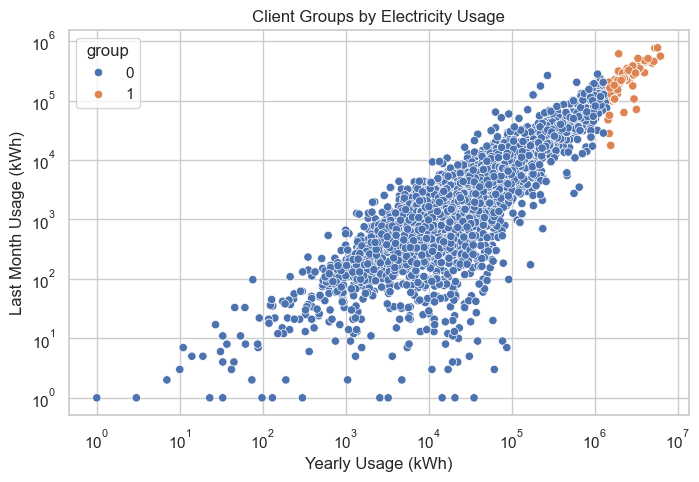

In [22]:
# Choose columns for grouping (electricity usage)
usage_columns = ['cons_12m', 'cons_last_month']

# Group clients into 2 types based on usage
group_model = KMeans(n_clusters=2, random_state=42)
combined_data['group'] = group_model.fit_predict(combined_data[usage_columns])

# Summarize each group
group_summary = combined_data.groupby('group').agg({
    'cons_12m': 'mean',
    'cons_last_month': 'mean',
    'churn': 'mean',
    'id': 'count'
}).rename(columns={'id': 'count'})
print("Group Summary:")
print(group_summary)

# Plot usage for each group
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cons_12m', y='cons_last_month', hue='group', data=combined_data)
plt.title('Client Groups by Electricity Usage')
plt.xlabel('Yearly Usage (kWh)')
plt.ylabel('Last Month Usage (kWh)')
plt.xscale('log')  # Use log scale because usage varies a lot
plt.yscale('log')
plt.savefig('client_groups.png')
plt.show()

### What We Found
- **Churn Prediction**: The logistic regression model is good at predicting who stays (100% correct) but fails to predict who leaves (0% correct) because only ~9.7% of clients churn. Profit (`net_margin`) and electricity usage (`cons_12m`) are the biggest reasons clients leave.
- **Price Trends**: Prices in 2015 were mostly stable (~0.13–0.15), with a small rise mid-year. Clients who left had slightly bigger price changes, but it’s not a big reason for churn.
- **Client Groups**:
  - **Group 0 (Residential)**: 14,560 clients, low usage (~150,000 kWh/year), ~9.7% churn.
  - **Group 1 (Commercial)**: 46 clients, high usage (~6.2M kWh/year), ~34.8% churn.

### Suggestions for PowerCo
1. **Help Commercial Clients Stay**: The 46 high-usage clients (Group 1) leave a lot (34.8%). Offer them special deals or better contracts to keep them.
2. **Focus on Profit and Usage**: Since low profit and low usage predict churn, check if these clients are unhappy with service or prices.
3. **Improve the Model**: Try a different model (e.g., random forest was better at 10% churn recall) or add info like sales channel (`channel_sales`) to predict churners better.